In [1]:
import numpy as np
import pandas as pd
import time
import datetime
from time import mktime
from datetime import datetime
import geopy

In [2]:
all_data = pd.read_csv('/content/atlantic.csv')
all_data = all_data[['ID','Name','Date','Time','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data.sample(5)

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
29722,AL151970,UNNAMED,19701001,1200,TD,14.0N,61.0W,30,-999
36559,AL111988,JOAN,19881018,600,HU,11.7N,75.0W,70,987
48494,AL012014,ARTHUR,20140705,600,TS,42.3N,67.6W,60,981
5577,AL111887,UNNAMED,18871008,0,TS,19.8N,92.5W,45,-999
44118,AL132005,LEE,20050902,1800,LO,33.9N,52.7W,25,1010


In [3]:
all_data = all_data.replace(to_replace=-999, value=0, regex=True)
x = all_data[["Minimum Pressure"]].mean(axis=0)
all_data = all_data.replace(to_replace=0, value=x, regex=True)
all_data.sample(5)

,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
8477,AL051897,UNNAMED,18971020,2000,TS,35.2N,75.5W,55,372.528561
30269,AL141971,GINGER,19711003,1800,EX,36.7N,74.1W,30,372.528561
39371,AL201995,SEBASTIEN,19951023,600,TS,20.1N,60.4W,45,1002.000000
18716,AL071937,UNNAMED,19370916,1200,TS,23.1N,94.2W,35,372.528561
33203,AL051979,UNNAMED,19790713,0,TD,31.8N,64.5W,30,372.528561


In [4]:
TIME = []
for entry in all_data.iterrows():
    try:
        if entry[1].Time == 0:
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H'))
        else:
            TIME.append(datetime.strptime(str(entry[1].Date)+' '+str(entry[1].Time),'%Y%m%d %H%M'))
    except:
        TIME.append(np.nan)
        continue

In [5]:
len(TIME) == len(all_data)

True

In [6]:
all_data = all_data[['ID','Name','Status','Latitude','Longitude','Maximum Wind','Minimum Pressure']]
all_data['TIME'] = TIME
all_data.tail()

<ipython-input-6-c8d49a330b59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['TIME'] = TIME


,ID,Name,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,TIME
49100,AL122015,KATE,EX,41.3N,50.4W,55,981.0,2015-11-12 12:00:00
49101,AL122015,KATE,EX,41.9N,49.9W,55,983.0,2015-11-12 18:00:00
49102,AL122015,KATE,EX,41.5N,49.2W,50,985.0,2015-11-13 00:00:00
49103,AL122015,KATE,EX,40.8N,47.5W,45,985.0,2015-11-13 06:00:00
49104,AL122015,KATE,EX,40.7N,45.4W,45,987.0,2015-11-13 12:00:00


In [7]:
from collections import defaultdict
def get_year():
    years = defaultdict(list)
    for entry in all_data.iterrows():
        years[entry[1].TIME.year].append(entry[1].ID)
    yearz = {}
    each_yr = []
    for key in years:
        each_yr.append(key)
        yearz[key] = set(years[key])
    num_hurricanes = []
    for x in yearz.values():
        num_hurricanes.append(len(x))
    return (each_yr, num_hurricanes)
def get_months():
    months = defaultdict(list)
    for entry in all_data.iterrows():
        months[entry[1].TIME.month].append(entry[1].ID)
    m = {}
    each_month = []
    for key in months:
        each_month.append(key)
        m[key] = set(months[key])
    num_hurricanes = []
    for x in m.values():
        num_hurricanes.append(len(x))
    return (each_month, num_hurricanes)

<Axes: xlabel='Status'>

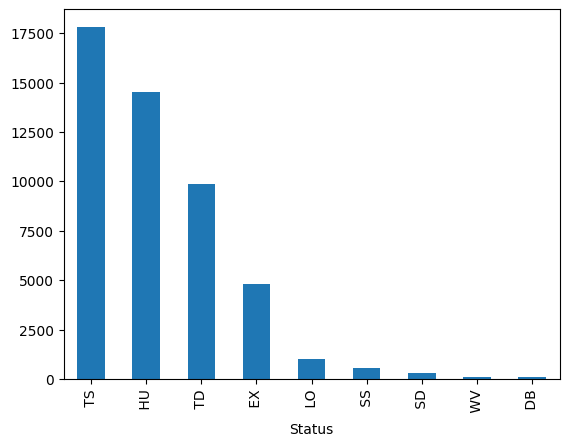

In [8]:
import matplotlib.pyplot as plt
all_data["Status"].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Number of Hurricanes in the Atlantic')

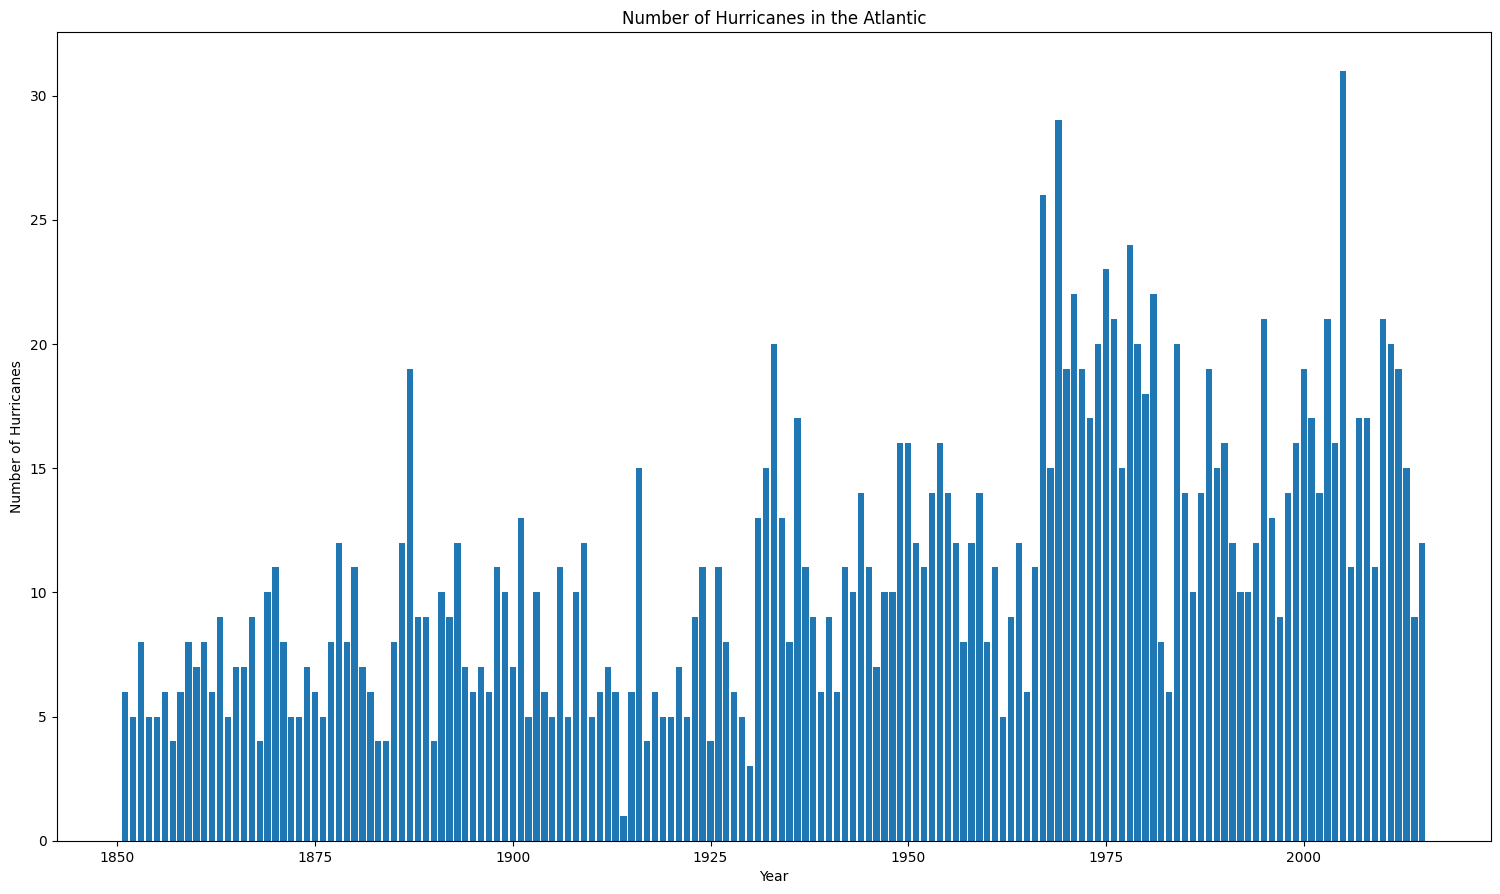

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
year_info = get_year()
plt.bar(year_info[0], year_info[1])
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes in the Atlantic')

Text(0.5, 1.0, 'Hurricanes by Month')

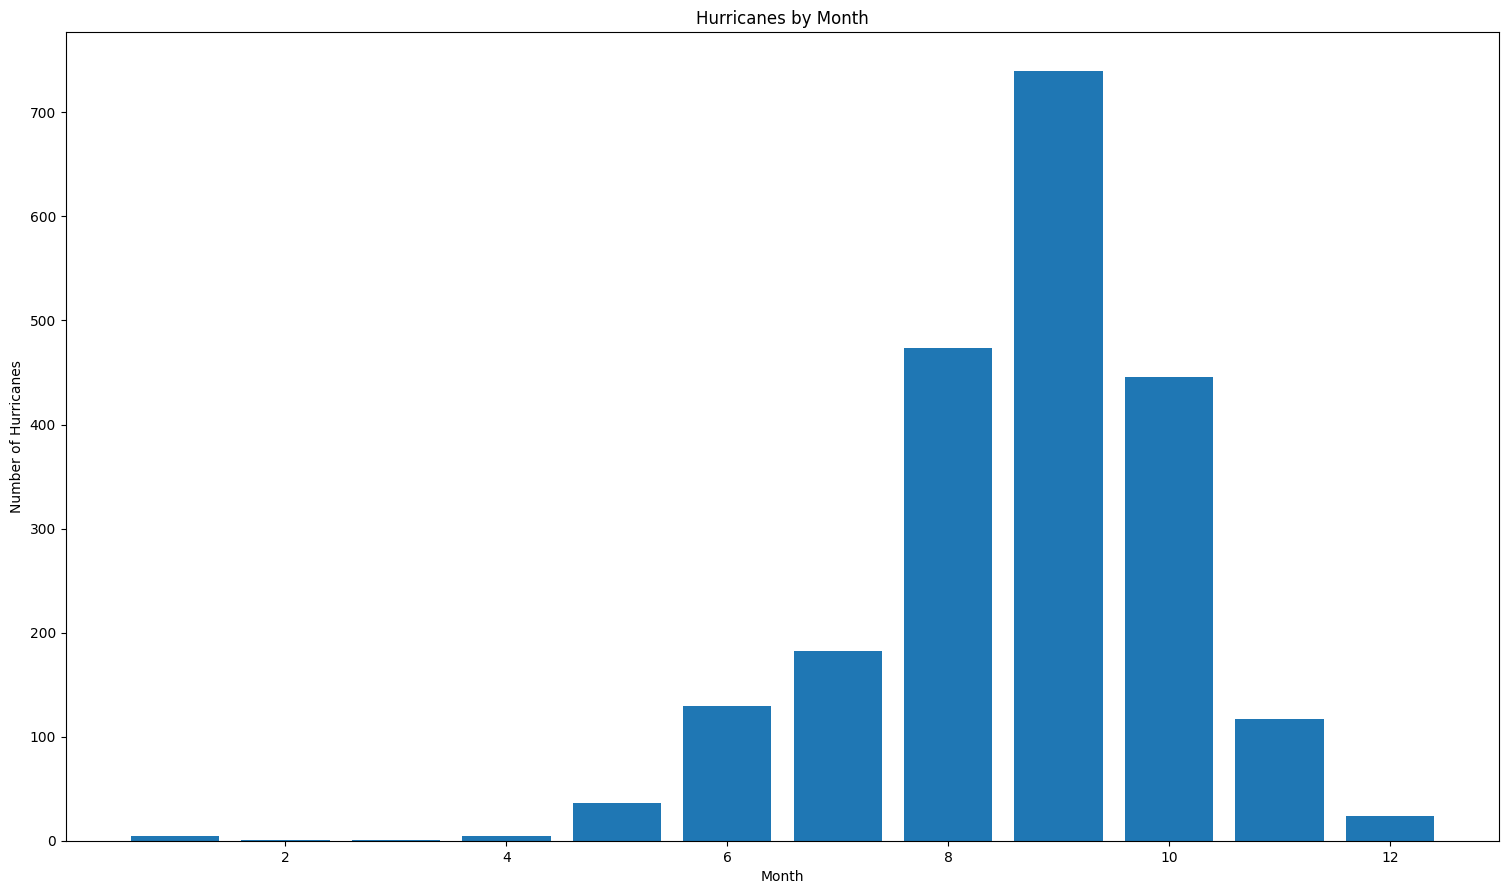

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
month_info = get_months()
plt.bar(month_info[0], month_info[1])
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.title('Hurricanes by Month')

In [11]:
import re
new_lat = []
new_long = []
for entry in all_data.iterrows():
    match = re.search('\d+.\d+', entry[1]['Latitude'])
    match2 = re.search('\d+.\d+', entry[1]['Longitude'])
    new_lat.append(float(match.group()))
    new_long.append(float('-'+match2.group()))
all_data['Longitude'] = new_long
all_data['Latitude'] = new_lat
long = all_data.groupby('ID')['Longitude'].apply(list)
lat = all_data.groupby('ID')['Latitude'].apply(list)

In [12]:
print("Are lat and long the same length? " + str(len(lat)==len(long)))
print(lat.head())
print(long.head())

Are lat and long the same length? True
ID
AL011851    [28.0, 28.0, 28.0, 28.1, 28.2, 28.2, 28.3, 28....
AL011852    [20.5, 20.7, 20.9, 21.1, 21.2, 21.5, 21.7, 21....
AL011853                                               [32.5]
AL011854    [26.0, 26.0, 26.0, 26.0, 26.0, 26.1, 26.2, 26....
AL011855                                               [22.2]
Name: Latitude, dtype: object
ID
AL011851    [-94.8, -95.4, -96.0, -96.5, -96.8, -97.0, -97...
AL011852    [-67.1, -68.0, -68.8, -69.6, -70.6, -71.9, -73...
AL011853                                              [-69.0]
AL011854    [-92.5, -93.0, -93.5, -94.0, -94.7, -95.7, -97...
AL011855                                              [-98.0]
Name: Longitude, dtype: object


In [16]:
!pip install geos
!pip install pyproj
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


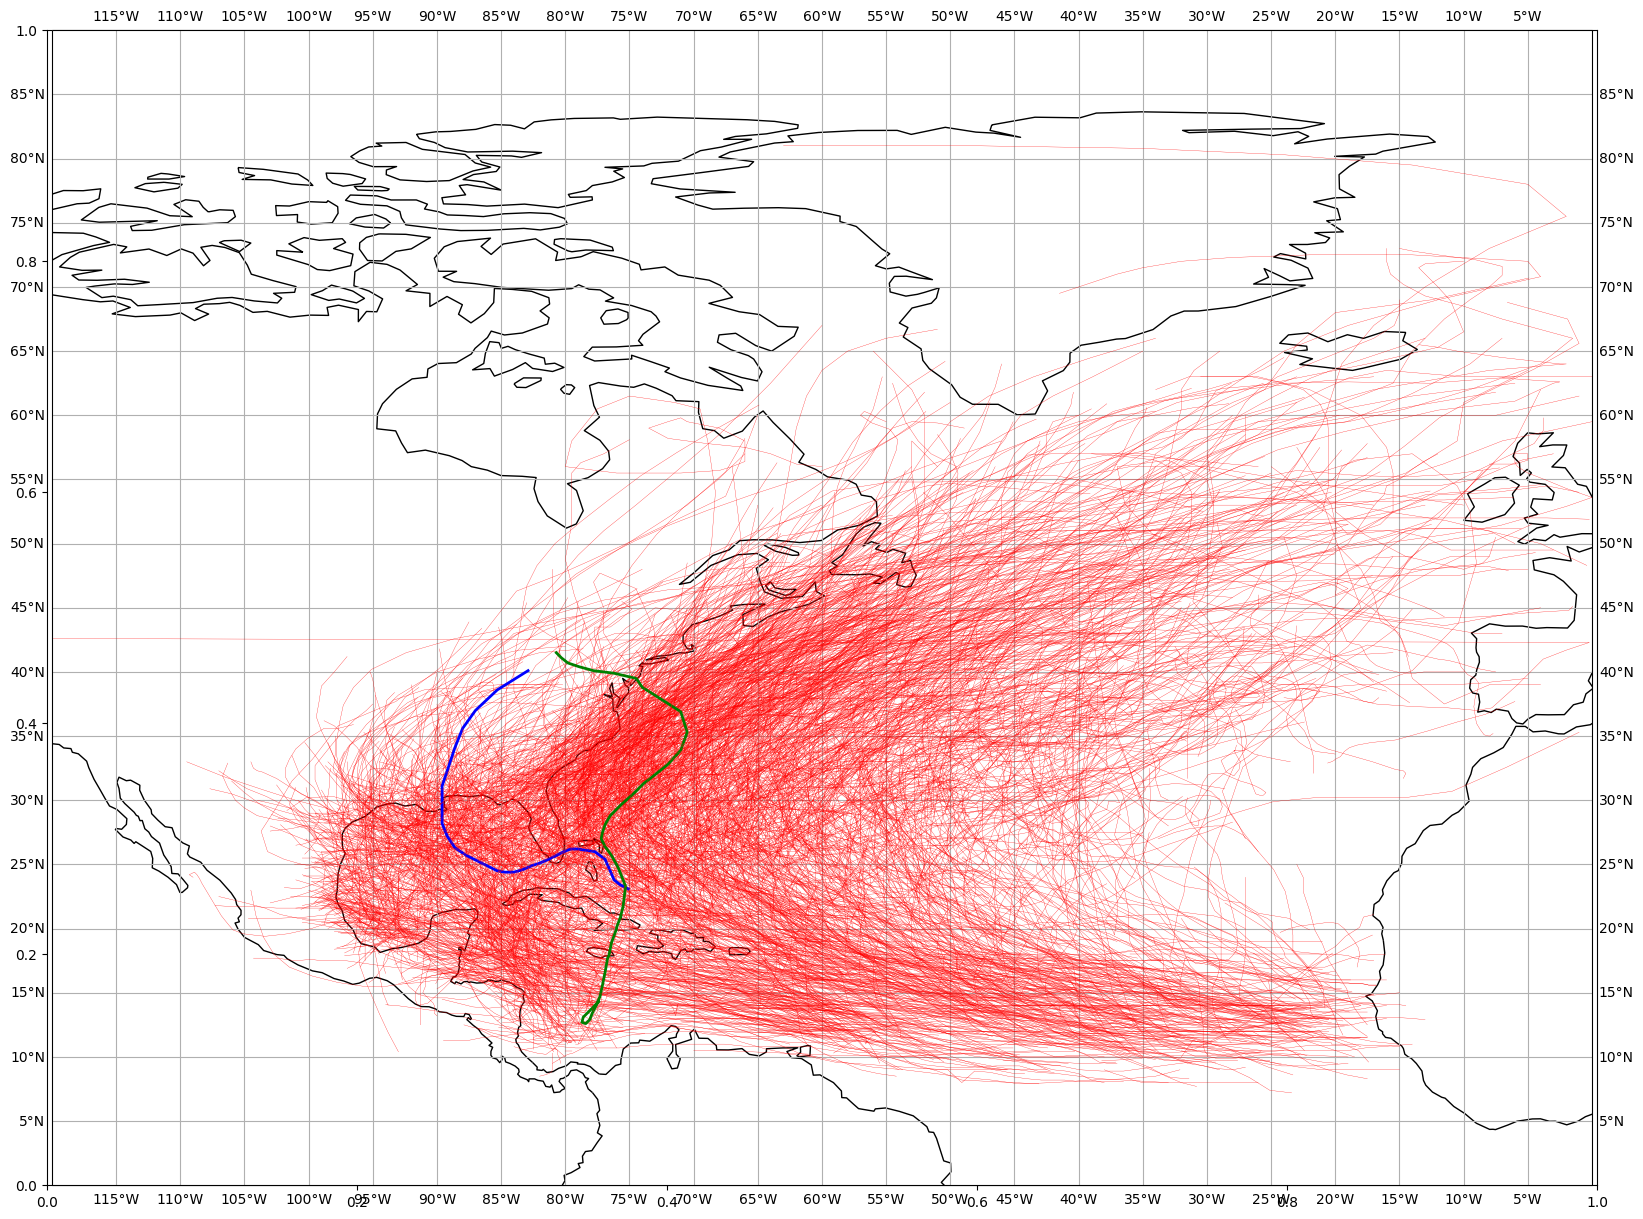

In [17]:
import matplotlib
import cartopy.crs as ccrs
import cartopy
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(lat)):
    if (lat.index[index] == 'AL122005'):
        ax.plot(long[index],lat[index],'b-',linewidth=2)
    elif (lat.index[index] == 'AL182012'):
        ax.plot(long[index],lat[index],'g-',linewidth=2)
    else:
        ax.plot(long[index],lat[index],'r-',linewidth=0.2)
plt.show()

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


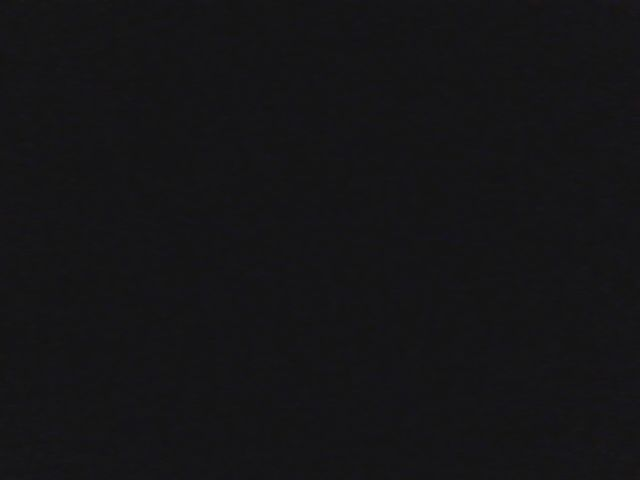

In [18]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
start_mid_end = pd.DataFrame(columns=['id', 'start_long','start_lat', 'mid_long','mid_lat','death_long','death_lat'])
for index in range(len(lat)):
    l = int(len(long[index])/2)
    ax.plot(long[index][l],lat[index][l],'ro',markersize=3)
    ax.plot(long[index][-1],lat[index][-1],'bo',markersize=3)
    ax.plot(long[index][0],lat[index][0],'go',markersize=3)
    start_mid_end = start_mid_end.append({'id':long.index[index], 'start_long':long[index][0],'start_lat':lat[index][0], 'mid_long':long[index][l],'mid_lat':lat[index][l],'death_long':long[index][-1],'death_lat':lat[index][-1]},ignore_index=True)
plt.show()

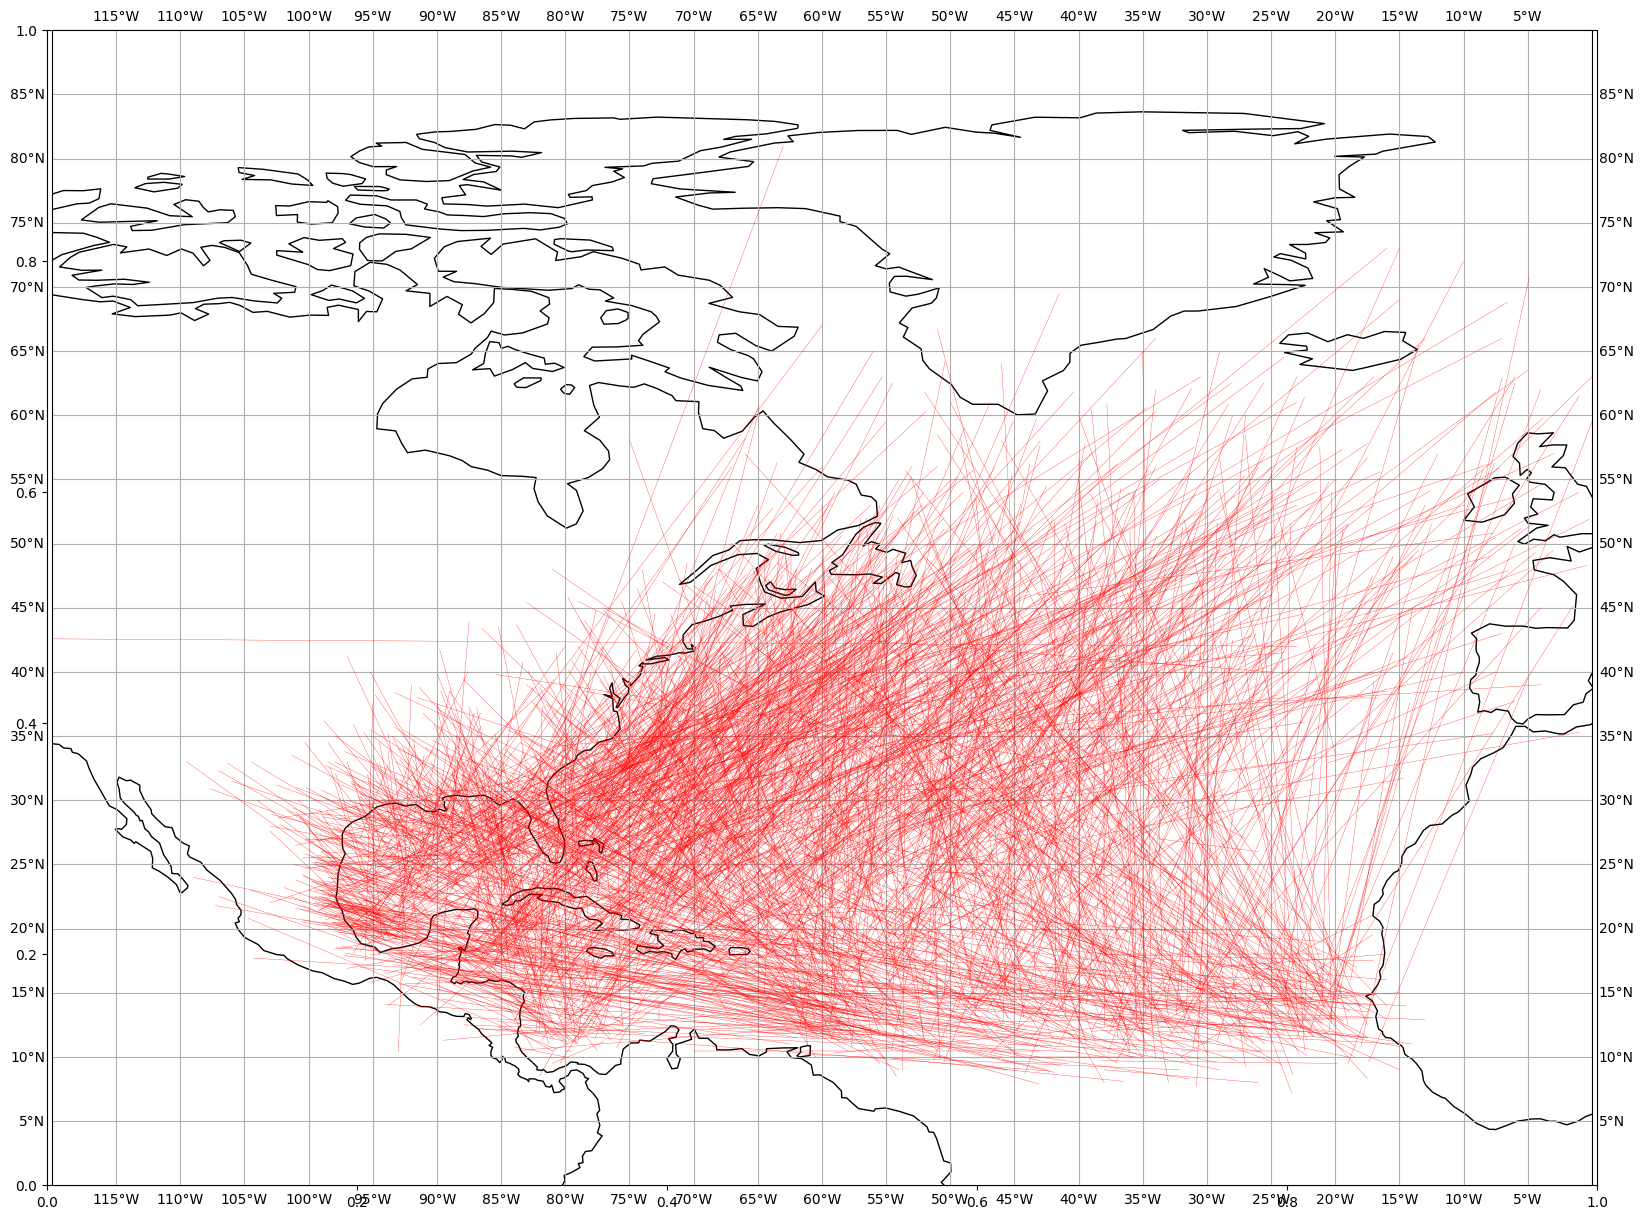

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
slope = []
for index in range(len(lat)):
    ax.plot([long[index][0],long[index][-1]],[lat[index][0],lat[index][-1]],'r-',linewidth=0.2)
    if (long[index][-1]-long[index][0] == 0):
        slope.append(None)
    else:
        slope.append((lat[index][-1] - lat[index][0])/(long[index][-1] - long[index][0]))
all_slopes = pd.Series(data=slope,index=lat.index)
plt.show()

In [21]:
from geopy.distance import geodesic
dist = []
for index in range(len(lat)):
    d = 0
    for pos in range(len(lat[index])-1):
        p1 = (lat[index][pos], long[index][pos])
        p2 = (lat[index][pos+1], long[index][pos])
        d = d + geodesic(p1,p2).miles
    dist.append(d)
all_dist = pd.Series(data=dist,index=lat.index)
len(all_dist) == len(all_slopes)

True

In [22]:
slope_dist = pd.concat([all_dist, all_slopes], axis=1)
slope_dist.columns =['distance traveled','slope']
slope_dist.sample(5)

,distance traveled,slope
ID,,
AL061866,2052.316229,-1.986667
AL041955,2707.074299,-2.238462
AL011905,295.611900,-0.316176
AL051878,2444.394787,-1.460905
AL122011,3474.744120,2.631579


(-25.0, 25.0)

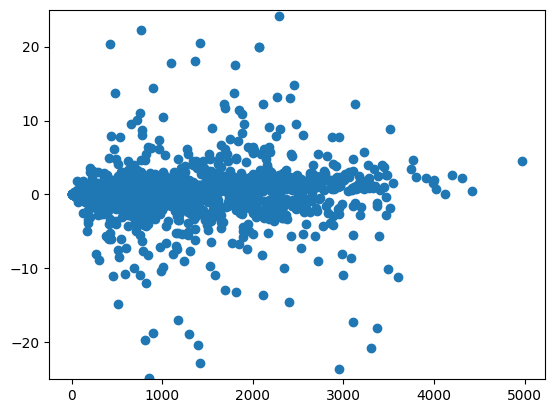

In [23]:
plt.scatter(slope_dist['distance traveled'], slope_dist['slope'])
plt.ylim(-25,25)

In [24]:
start_mid_end

,id,start_long,start_lat,mid_long,mid_lat,death_long,death_lat


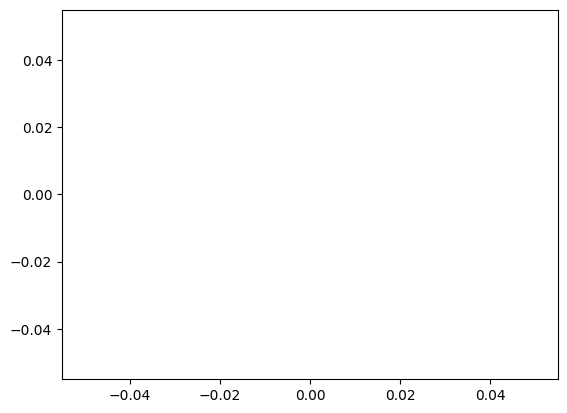

In [25]:
plt.scatter(start_mid_end['mid_long'], start_mid_end['mid_lat'])
plt.show()

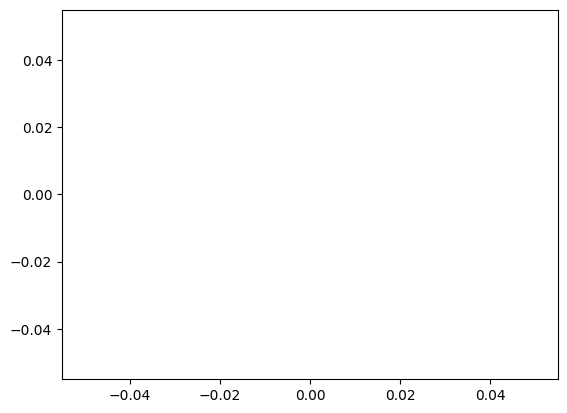

In [26]:
plt.scatter(start_mid_end['start_long'], start_mid_end['start_lat'])
plt.show()

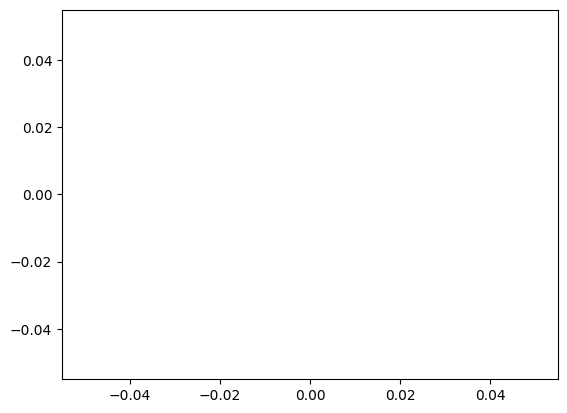

In [27]:
plt.scatter(start_mid_end['death_long'], start_mid_end['death_lat'])
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
from collections import defaultdict

In [29]:
def doAgglo(X, num_clusters):
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity = 'euclidean', linkage = 'ward')
    labels = model.fit_predict(X)
    return (labels)
def get_plot(X1,X2,lab,t):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X1,X2,c=lab, s=50)
    plt.xlim(-120,0)
    plt.ylim(0,90)
    plt.title(str(t) + ' Clusters')
def c_mean_2(vals,labels,n_clusters):
    sorter = defaultdict(list)
    for index in range(len(labels)):
        sorter[labels[index]].append(vals[index])
    some = 0
    for cluster_num in range(n_clusters):
        arr = np.asarray(sorter[cluster_num])
        some = some + np.sum(np.square(np.asarray(arr) - np.mean(arr)))
    return some/len(vals)

In [36]:
err = []
for i in range(1,7):
    temp = 0
    lab = doAgglo(start_mid_end[['mid_long','mid_lat']],i)
    get_plot(start_mid_end['start_long'],start_mid_end['start_lat'],lab,i)
    get_plot(start_mid_end['mid_long'],start_mid_end['mid_lat'],lab,i)
    get_plot(start_mid_end['death_long'],start_mid_end['death_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['mid_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['start_lat'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_long'],lab,i)
    temp = temp + c_mean_2(start_mid_end['death_lat'],lab,i)
    err.append(temp)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 2 is required by AgglomerativeClustering.

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

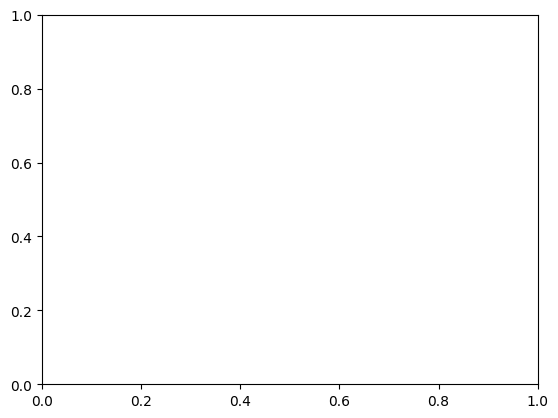

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,7),err)

In [32]:
lab = doAgglo(start_mid_end[['mid_long','mid_lat']],3)
df0 = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
dfALL = pd.DataFrame()
for index in range(len(start_mid_end)):
    if (lab[index] == 0):
        df0 = df0.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 1):
        df1 = df1.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
    elif (lab[index] == 2):
        df2 = df2.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
        dfALL = dfALL.append({'id':start_mid_end['id'][index],'lats':lat[start_mid_end['id'][index]], 'longs':long[start_mid_end['id'][index]]},ignore_index=True)
print(len(dfALL))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 2 is required by AgglomerativeClustering.

In [ ]:
len(df1) + len(df0) + len(df2)

In [ ]:
df0.head()

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
ax.coastlines()
for index in range(len(df0)):
    ax.plot(df0['longs'][index],df0['lats'][index],'r-',linewidth=0.2)
for index in range(len(df1)):
    ax.plot(df1['longs'][index],df1['lats'][index],'b-',linewidth=0.2)
for index in range(len(df2)):
    ax.plot(df2['longs'][index],df2['lats'][index],'g-',linewidth=0.2)

plt.show()

In [ ]:
def f_transf(lati,longi):
    if (lati < 90) and (lati >= 0) and (longi < 0) and (longi > -120):
        return (int(lati) * 121) + int((-longi))
    else:
        return None
def index_to_coord(index):
    return((index/121),(-(index%121)))

In [ ]:
def make_markhov_values(data, mat_in, f_tranf):
    for coord_list in data.iterrows():
        l = len(coord_list[1]['lats'])
        for index in range(l-1):
            pos = f_tranf(coord_list[1]['lats'][index],coord_list[1]['longs'][index])
            pos_pr = f_tranf(coord_list[1]['lats'][index + 1],coord_list[1]['longs'][index + 1])
            if (pos == None) or (pos_pr == None):
                break
            mat_in[pos][pos_pr] = mat_in[pos][pos_pr] + 1
        pos1 = f_tranf(coord_list[1]['lats'][-1],coord_list[1]['longs'][-1])
        if (pos1 != None):
            mat_in[pos1][-1] = mat_in[pos1][-1] + 1
    return mat_in
def fix_probability(mat_in):
    for i in range(len(mat_in)):
        if sum(mat_in[i]) == 0:
            mat_in[i][-1] = 1
        l = mat_in[i]/sum(mat_in[i])
        mat_in[i] = l
    return mat_in

In [ ]:
size = 10890
def generate(matrix, start_lat, start_long,f_to, f_back):
    path = []
    dead_hur = False
    curr_index = f_to(start_lat,start_long)
    path.append(f_back(curr_index))
    while not dead_hur:
        arr = (np.random.choice(range(0,len(matrix)), 1, p=matrix[curr_index]))
        curr_index = arr[0]
        if (curr_index != len(matrix) - 1):
            path.append(f_back(curr_index))
        else:
            dead_hur = True
    return path

In [ ]:
mat0 = np.zeros(shape=(size,size))
mat0 = make_markhov_values(df0,mat0,f_transf)
mat0 = fix_probability(mat0)

In [ ]:
mat1 = np.zeros(shape=(size,size))
mat1 = make_markhov_values(df1,mat1,f_transf)
mat1 = fix_probability(mat1)

In [ ]:
mat2 = np.zeros(shape=(size,size))
mat2 = make_markhov_values(df2,mat2,f_transf)
mat2 = fix_probability(mat2)

In [ ]:
matALL = np.zeros(shape=(size,size))
matALL = make_markhov_values(dfALL,matALL,f_transf)
matALL = fix_probability(matALL)

In [ ]:
import reverse_geocoder as rg
def make_predict(actual_longs,actual_lats, num, matrix):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 15)
    ax = plt.axes(projection = ccrs.PlateCarree())
    ax.set_extent([-120,0,90,0], ccrs.PlateCarree())
    ax.gridlines(xlocs=range(-120,5,5), ylocs=range(0,100,5),draw_labels=True)
    ax.coastlines()
    start_lat = actual_lats[0]
    start_long = actual_longs[0]
    for i in range(num):
        arr = list(map(list, zip(*generate(matrix,start_lat,start_long,f_transf,index_to_coord))))
        ax.plot(arr[1],arr[0])
        print(i, len(arr[1]), len(arr[0]))
        for j in range(len(arr[1])):
            x = arr[1][j]
            y = arr[0][j]
            coordinates = (x,y)
            loc = rg.search(coordinates)
            print(loc)
    ax.plot(actual_longs,actual_lats,'bo',markersize=3)
    plt.show()

In [ ]:
def predict_path(genesis):
    batch_size = 1;
    atl1_id = None;
    try:
        hurricane = df0.loc[df0['id'] == atl_id]
        make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat0)
    except:
        try:
            hurricane = df1.loc[df1['id'] == atl_id]
            make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat1)
        except:
            try:
                hurricane = df2.loc[df2['id'] == atl_id]
                make_predict(list(hurricane['longs'])[0],list(hurricane['lats'])[0],batch_size,mat2)
            except:
                make_predict(genesis[0],genesis[1],batch_size,matALL)

In [ ]:
#predict_path('AL122005',(None, None),1)

In [ ]:
predict_path(([-40], [15]))

In [ ]:
predict_path(([-50], [20]))